# QUESTION 1

In [1]:
#Step 1: Importing the necessary libraries
import pandas as pd
import numpy as np

In [2]:
#Step 2: Importing data from the website and assigning it to variable users
users= pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|')

#To see the data

users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
#Step 4: Calculating the mean age per occupation

users[["age", "occupation"]].groupby("occupation").mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [5]:
#Step 5: Calculating the male ratio per occupation and sort it from the most to the least
#Creating a dataframe
def gender_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
#Applying the dataframe to gender
users['gender_n'] = users['gender'].apply(gender_numeric)

#Calculating the ratio
result = users.groupby('occupation').gender_n.sum() /users.occupation.value_counts() * 100

#To sort from the most to the least
result.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [6]:
#Step 6:Calculating the minimum and maximum age for each occupation
users.groupby('occupation').age.agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [7]:
#Step 7: For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [8]:
#Step 8:For eachoccupation present the percentage of women and men
#Creating a dataframe & applying count to gender
gender_occup = users.groupby(['occupation','gender']).agg({'gender': 'count'})

#Creating a dataframe& applying count to each occupation
occup_count = users.groupby(['occupation']).agg('count')

#Divide the gender_occup per the occup_count and multiply per 100
occup_gender = gender_occup.div(occup_count, level = "occupation") * 100

#Presenting all row from the 'gender column'
occup_gender.loc[:, 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# QUESTION 2

In [9]:
#Step 1: Importing the necessary libaries
import pandas as pd

In [12]:
#Step 2 & 3: Importing data from the website and assigning it to variable euro12
euro12 = pd.read_table('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv',sep=',')
euro12.head

<bound method NDFrame.head of                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13  

In [13]:
#Step 4: Select only the goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [14]:
#Steps 5: How many team partcipated in the Euro2021
euro12.shape[0]

16

In [15]:
#Step 6: What is the number of columns in the dataset?

columns = len(euro12.axes[1])
print("Total column no: ", columns)

Total column no:  35


In [20]:
#Step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called descipline

discipline = pd.DataFrame(euro12, columns = ['Team', 'Yellow Cards','Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [21]:
#Step 8: Sort the teams by Yellow Cards, then to Red Cards
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [22]:
#Step 9: Calculate the mean Yellow Cards given per Team
discipline[["Yellow Cards", "Team"]].groupby("Team").mean()

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


In [24]:
#Step 10: Filter teams that scored more than 6 goals

euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [27]:
#Step 11: Select the teams that start with G
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [28]:
#Step 12: Select the first 7 columns
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [29]:
#Step 13: Select all columns except the last 3
euro12[euro12.columns[:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [30]:
#Step 14: Presentonly the Shooting Accuracy from England, Italy and Russia
ind_data = euro12.set_index('Team')
ind_data.loc[['England', 'Italy', 'Russia'],['Shooting Accuracy']]

,Shooting Accuracy
Team,
England,50.0%
Italy,43.0%
Russia,22.5%


# QUESTION 3

In [7]:
#Importing the necessary libaries

import pandas as pd
import numpy as np
import random

In [8]:
#Step 2: Create 3 differents Series, each of length 100, as follows:

#creating first random number from 1 to 4

first_random = [[random.randint(1, 4)] for i in range(100)]
df_first = pd.DataFrame(first_random)
df_first

,0
0,4
1,3
2,3
3,3
4,1
...,...
95,4
96,3
97,3
98,2


In [9]:
#creating second random number from 1 to 3
sec_random = [[random.randint(1, 3)] for i in range(100)]
df_sec = pd.DataFrame(sec_random)
df_sec

,0
0,3
1,1
2,3
3,2
4,3
...,...
95,2
96,3
97,1
98,1


In [10]:
#The third a random number from 10,000 to 30,000

third_random = [[random.randint(10000, 30000)] for i in range(100)]
df_third = pd.DataFrame(third_random)
df_third

,0
0,23026
1,20085
2,23720
3,22540
4,25914
...,...
95,12554
96,15752
97,12648
98,22942


In [11]:
#Step 3. Create a DataFrame by joinning the Series by column
df = pd.concat([df_first, df_sec, df_third], axis=1)
df

,0,0,0
0,4,3,23026
1,3,1,20085
2,3,3,23720
3,3,2,22540
4,1,3,25914
...,...,...,...
95,4,2,12554
96,3,3,15752
97,3,1,12648
98,2,1,22942


In [12]:
#Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,4,3,23026
1,3,1,20085
2,3,3,23720
3,3,2,22540
4,1,3,25914
...,...,...,...
95,4,2,12554
96,3,3,15752
97,3,1,12648
98,2,1,22942


In [14]:
#Step 5: Create a one column DataFrame with the values of the 3 series and assign it to 'bigcolumn'

bigcolumn=df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.astype(str))
bigcolumn

0     4323026
1     3120085
2     3323720
3     3222540
4     1325914
       ...   
95    4212554
96    3315752
97    3112648
98    2122942
99    2215296
Name: bedrs, Length: 100, dtype: object

In [15]:
#Step 6: Ops it seems it is going only until index 99. Is it true?
#Solution: Yes it is true

print(bigcolumn)

0     4323026
1     3120085
2     3323720
3     3222540
4     1325914
       ...   
95    4212554
96    3315752
97    3112648
98    2122942
99    2215296
Name: bedrs, Length: 100, dtype: object


In [16]:
#Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index
bigcolumn.reindex(index=range(0,299))

0      4323026
1      3120085
2      3323720
3      3222540
4      1325914
        ...   
294        NaN
295        NaN
296        NaN
297        NaN
298        NaN
Name: bedrs, Length: 299, dtype: object

# QUESTION 4

In [17]:
#Importing the libaries

import pandas as pd
import datetime

In [20]:
#Step 2: Import the dataset from the attached file wind.txt
data = pd.read_csv("wind.txt")

#Step 3: assign it to a variable called data and replace the first 3 columns by a proper datetime index
data = pd.read_csv("wind.txt", sep = "\s+", parse_dates = {'Date':[0,1,2]})
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [21]:
#Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
import datetime as dt

def right_year(x):
    if x.year > 2021:
        year = x.year - 100
    else:
        year = x.year
    return dt.date(year,x.month,x.day)
data['Date']=data['Date'].apply(lambda x: right_year(x))
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [22]:
#Step 5: Set right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data['Date'] = data['Date'].astype('datetime64[ns]')
data = data.set_index('Date')

In [24]:
# Step 6: Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below
print(data.isnull().sum())

# Step 7
(data.notnull().sum())
print(data.notnull().sum().sum())


# Step 8
print(data.mean().mean())

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
78857
10.227982360836924


In [25]:
#Step 9: Create a DataFrame called loc_stats and calculate the min, max and mean
#windspeeds and standard deviations of the windspeeds at each location over all the
#days, A different set of numbers for each location.
loc_stats = data.agg(["count", "min", "max", "mean", "std"])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [26]:
#Step 10: Create a DataFrame called day_sats and calculate the min, max and mean
#windspeed and standard deviations of the windspeeds across all the locations at each
#day. A different set of numbers for each day

day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats.head()

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [27]:
#Step 11: Find the average windspees in January for each location.Treat January 1961 and January
#1962 both as January.
avg_windspees=data[data.index.month==1]
avg_windspees.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [28]:
#Step 12: Downsample the record to a yearly frequency for each location.
yearly_freq = data.resample(rule = "Y")
print(yearly_freq.mean())

                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

In [30]:
#Step 13. Downsample the record to a monthly frequency for each location
Monthly_freq = data.resample(rule = "M")
print(Monthly_freq.mean())

                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

In [31]:
#Step 14: Downsample the record to a weekly frequency for each location.
weekly_freq = data.resample(rule = "W")
print(weekly_freq.mean())

                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

In [32]:
#Step 15: Calculate the min, max and mean windspeeds and standard deviation of the
#windspeeds across all locations for each week (assume that the first week starts on 
#January 2 1961) for the first 52 weeks.

weekly = data.resample(rule = "W").agg(['min', 'max', 'std'])
print(weekly.head())

              RPT                     VAL                     ROS         \
              min    max       std    min    max       std    min    max   
Date                                                                       
1961-01-01  15.04  15.04       NaN  14.96  14.96       NaN  13.17  13.17   
1961-01-08  10.58  18.50  2.631321   6.63  16.88  3.949525   7.62  12.33   
1961-01-15   9.04  19.75  3.555392   3.54  12.08  3.148945   7.08  19.50   
1961-01-22   4.92  19.83  5.337402   3.42  14.37  3.837785   7.29  20.79   
1961-01-29  13.62  25.04  4.619061   9.96  23.91  5.170224  12.67  25.84   

                       KIL  ...       MUL    CLO                     BEL  \
                 std   min  ...       std    min    max       std    min   
Date                        ...                                            
1961-01-01       NaN  9.29  ...       NaN  12.58  12.58       NaN  18.50   
1961-01-08  1.604761  4.58  ...  1.722255   5.88  10.46  1.704941   5.46   
1961-01-15 

# QUESTION 5

In [33]:
#Step 1: Import the necessary libraries
import numpy as np
import pandas as pd

In [34]:
#Step 2: Import the dataset from this address.
#Step 3: Assign it to a variable called chipo
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep="\t")

#Step 4: See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [35]:
#Step 5: What is the number of observations in the dataset?
chipo.shape[0]

4622

In [36]:
#Step 6: What is the number of columns in the dataset?
len(chipo.axes[1])

5

In [37]:
#Step 7: Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [38]:
#Step 8: How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [39]:
#Step 9: Which was the most-ordered item?
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [40]:
#Step 10: For the most-ordered item, how many items were ordered?
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [41]:
#Step 11: What was the most ordered item in the choice_description column?
chipo.groupby(by="choice_description").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [42]:
#Step 12: How many items were ordered in total?
chipo.item_name.count()

4622

In [43]:
#step 13a: Create a lambda function and change the type of item price
def num_float(x):
    return float(x[1:-1])
chipo.item_price = chipo.item_price.apply(num_float)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [45]:
#step 13b:Check the item price type:
chipo.item_price.dtype

dtype('float64')

In [46]:
#Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo.item_price * chipo.quantity).sum()
print('Total Revenue = $', revenue)

Total Revenue = $ 39237.02


In [47]:
#Step 15: How many orders were made in the period?
chipo.order_id.value_counts().count()

1834

In [49]:
#Step 16: What is the average revenue amount per order?
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [50]:
#Step 17: How many different items are sold?
chipo.item_name.value_counts().count()

50

# QUESTION 6

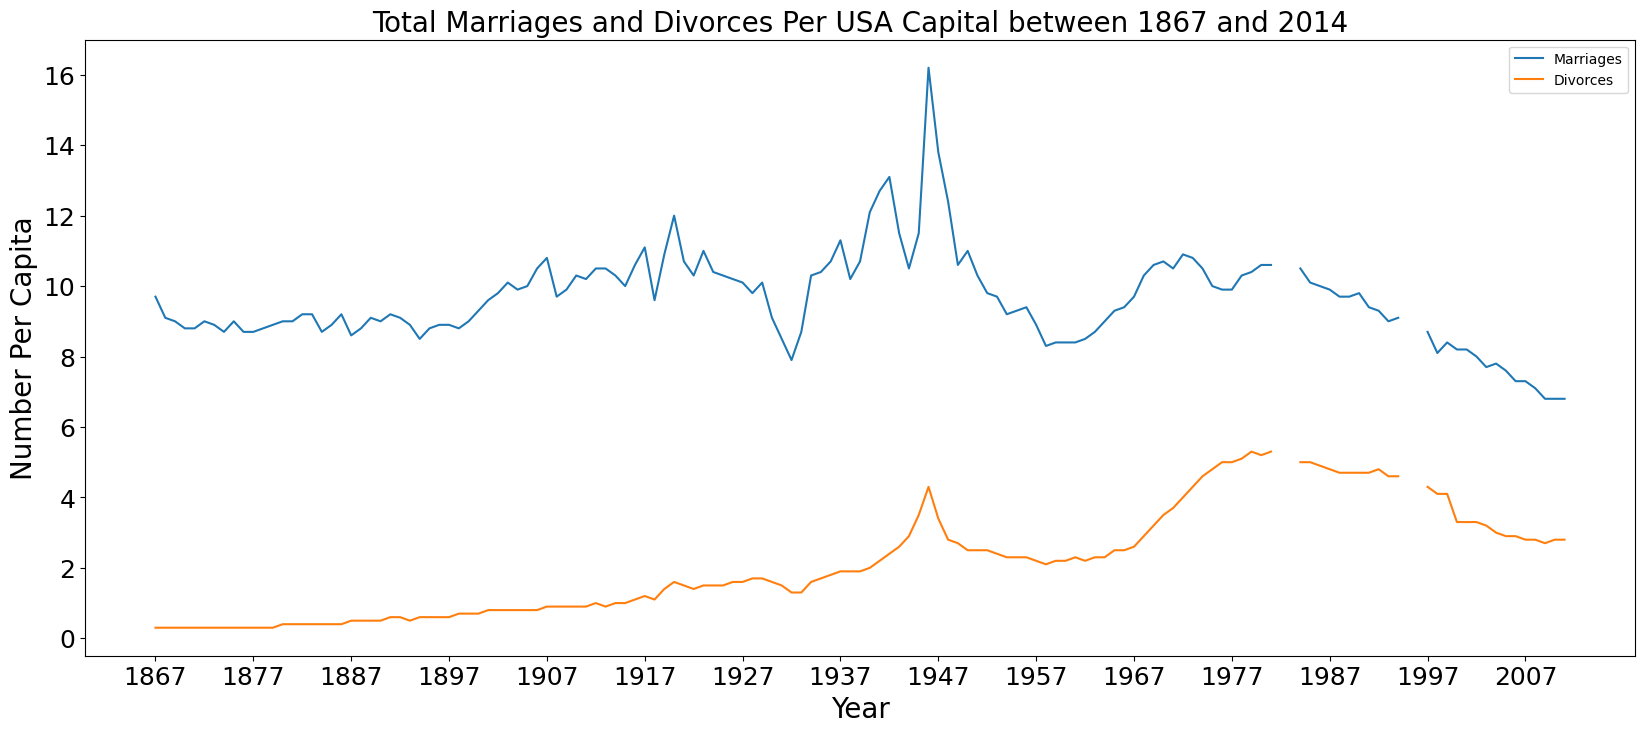

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("us-marriages-divorces-1867-2014.csv")
plt.figure(figsize=(20,8))
plt.plot(df.Year,df.Marriages_per_1000,label="Marriages")
plt.plot(df.Year,df.Divorces_per_1000,label="Divorces")
plt.title('Total Marriages and Divorces Per USA Capital between 1867 and 2014',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number Per Capita',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.xticks(df.Year[::10])
plt.show()

# QUESTION 7

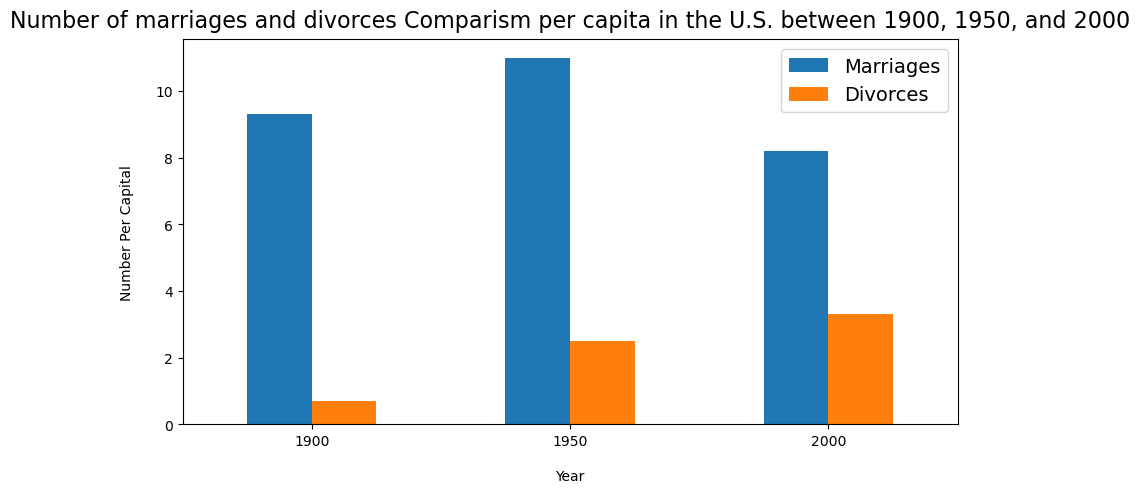

In [54]:
#Creating a vertical bar chart

df = df[(df.Year == 1900) | (df.Year == 1950) |(df.Year == 2000)]
df.set_index('Year')[['Marriages_per_1000', 'Divorces_per_1000']].plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=360)
plt.title("Number of marriages and divorces Comparism per capita in the U.S. between 1900, 1950, and 2000", fontsize=16, y=1.01)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Number Per Capital", labelpad=15)
plt.legend(["Marriages", "Divorces"], fontsize=14)

# QUESTION 8

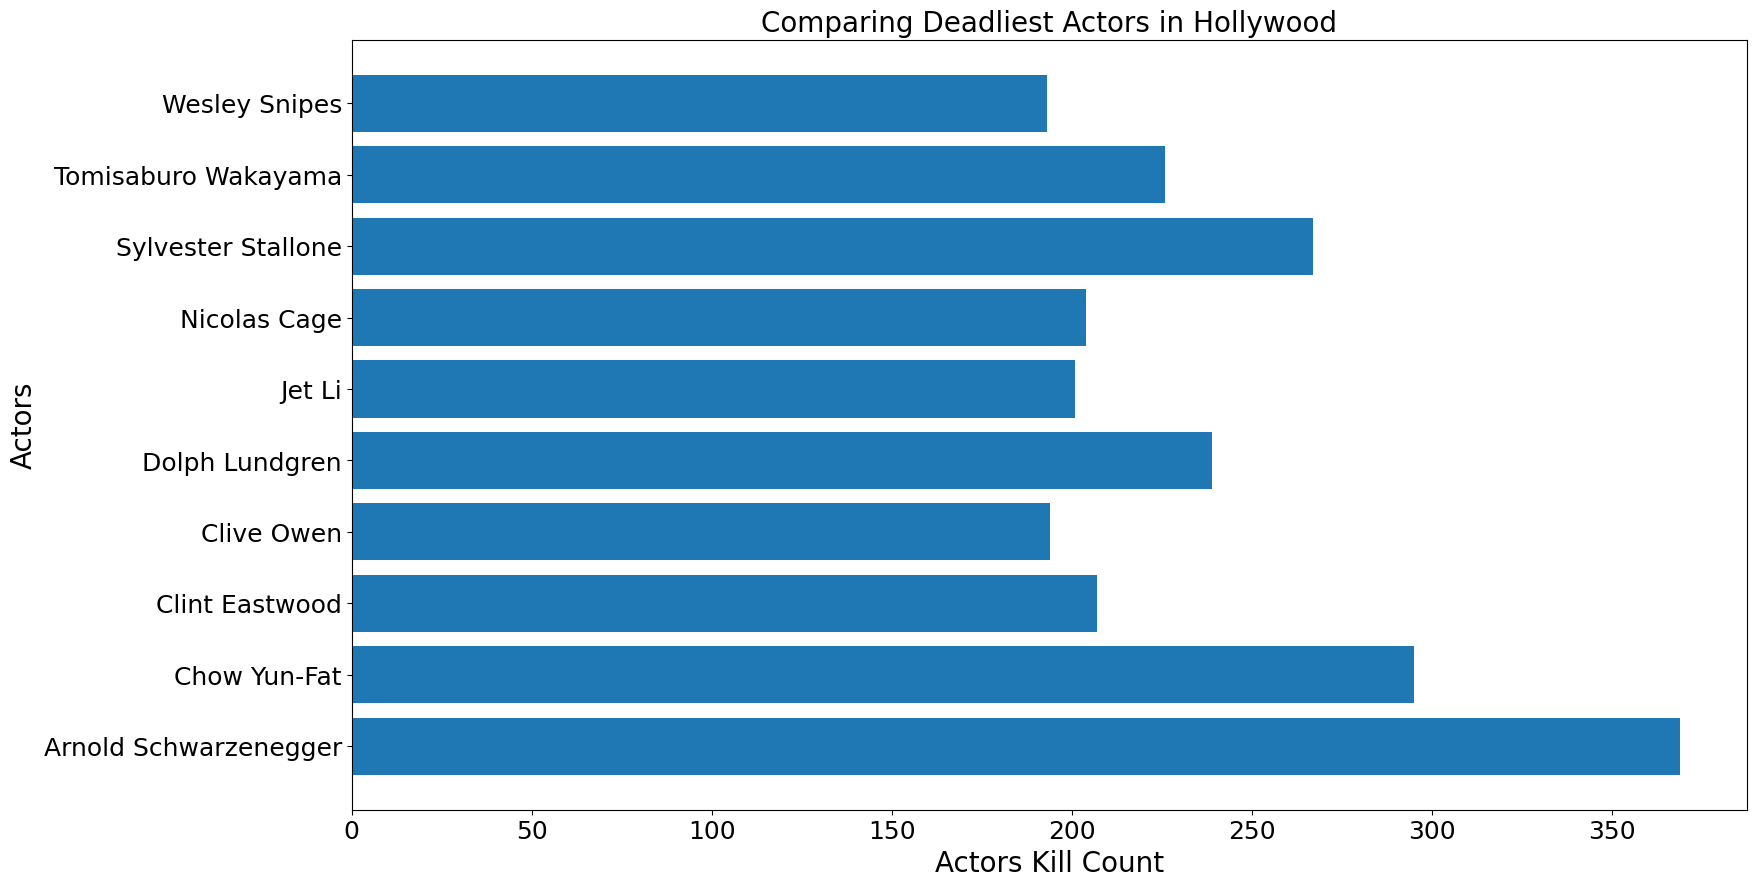

In [55]:
#Creating a Horizontal Bar Chart

import pandas as pd
import matplotlib.pyplot as plt

hollywood = pd.read_csv("actor_kill_counts.csv")
hollywood

plt.figure(figsize=(18,10))
plt.barh(hollywood.Actor,hollywood.Count,align='center')
hollywood = hollywood.sort_values('Count',ascending = True)
plt.title('Comparing Deadliest Actors in Hollywood',fontsize=20)
plt.xlabel('Actors Kill Count',fontsize=20)
plt.ylabel('Actors',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# QUESTION 9

In [57]:
#Creating a Pie chart
import pandas as pd
roman_emporer = pd.read_csv("roman-emperor-reigns.csv")
roman_emporer.head()
from plotly.offline import iplot

pie1 = roman_emporer.Cause_of_Death
labels = roman_emporer.Cause_of_Death

fig = {  "data": [   {
      "labels": labels,
      "domain": {"x": [.4, .10]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": 0,
      "type": "pie"
    },],
    
    
  "layout": {
        "title":"Causes of Death of all Roman Emporer",
         
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
                "text":"",
                "x": 0.20,
                "y": 1
            },]}}
iplot(fig)

# QUESTION 10

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

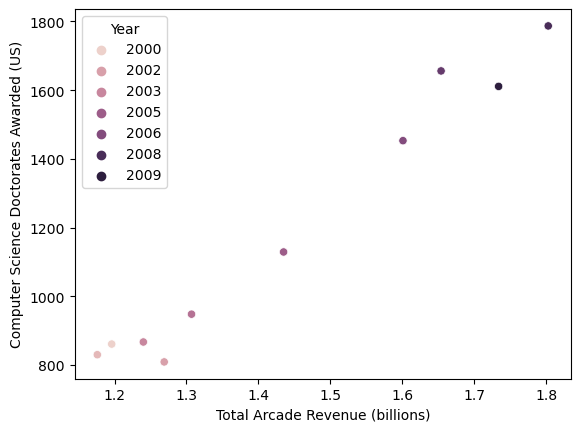

In [58]:
#Creating a scatter plot

import pandas as pd
import seaborn as sns

total_revenue = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', 
                data=total_revenue)